In [1]:
import os
import sys
src_dir = os.path.join(os.getcwd(), '..', 'src')
sys.path.append(src_dir)

from utils import GLOBAL, functions

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

In [3]:
df = pd.DataFrame()

#Change based on year you are targeting
year = 2019

#Change based on scoring format
scoring_format = 'HalfPPRFantasyPoints'

WEEKLY_BASE_URL = "https://raw.githubusercontent.com/fantasydatapros/data/master/weekly/{year}/week{week}.csv"

for week in range(1, 18):
    weekly_df = pd.read_csv(WEEKLY_BASE_URL.format(year=year, week=week))
    weekly_df['Week'] = week
    df = pd.concat([df, weekly_df])

In [4]:
df = df.replace({
    'Pos': {
        'HB': 'RB',
        'WR/RS': 'WR',
        'WR/PR': 'WR',
        'FB/TE': 'TE',
        'FB/HB': 'RB'
    }
})

In [5]:
skill_positions = ['QB', 'WR', 'TE', 'RB']

df = df.loc[df['Pos'].isin(skill_positions)]

In [6]:
columns = ['Player', 'Tm', 'Pos', 'Week', scoring_format]

pos_df = df[columns]

pos_df = pos_df.groupby(['Player', 'Tm', 'Pos'], as_index=False).agg({
    scoring_format: np.mean
})

In [12]:
#Finding QB1, RB1, RB2, WR1, WR2, WR3, TE1, TE2
#Can change values below to target more players, i.e. WR4 or RB3

position_map = {
    'QB': 1,
    'RB': 2,
    'WR': 3,
    'TE': 2
}

corr_df = pd.DataFrame()

for pos, n_spots in position_map.items():
    for n in range(1, n_spots+1):
        new_df = functions.get_top_n_player_at_eac_position(pos_df, pos, n, scoring_format)

        new_df = new_df.rename({scoring_format: f'{pos}{n}'}, axis=1)

        corr_df = pd.concat([corr_df, new_df], axis=1)

corr_df = corr_df.drop(['Pos', 'Player', 'Tm'], axis=1)

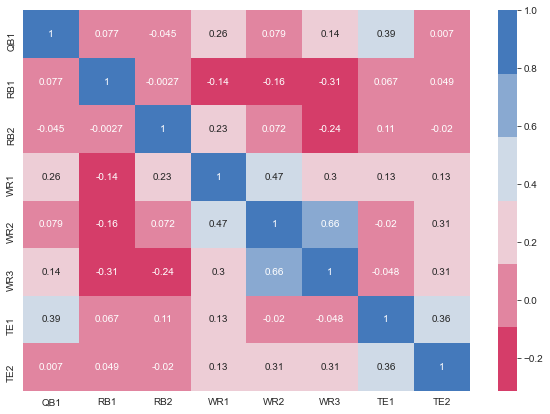

In [20]:
plt.figure(figsize=(10, 7))

sns.heatmap(corr_df.corr(), annot=True, cmap=sns.diverging_palette(0, 250));

Want to be looking for positively correlated pos to stack.